In [1]:
import os
import h5py
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = '../data/labeled-elm-events-large.hdf5'
hf = h5py.File(path, 'r')
elm_indices = np.array([int(key) for key in hf], dtype=np.int32)
elm_indices[:10]

array([  6,  12,  24,  26,  60,  70,  72, 142, 212, 220], dtype=int32)

In [3]:
elm_max_vals = {}
for elm_index in elm_indices:
    elm_key = f'{elm_index:05d}'
    elm_event = hf[elm_key]
    signals = np.array(elm_event['signals'], dtype=np.float32).T
    labels = np.array(elm_event['labels'], dtype=np.float32)
    max_val = np.amax(signals, axis=0)
    elm_max_vals[elm_key] = max_val
df = pd.DataFrame.from_dict(elm_max_vals).T
df.columns = [f'CH{i}' for i in range(1, 65)]
df

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH55,CH56,CH57,CH58,CH59,CH60,CH61,CH62,CH63,CH64
00006,9.917592,9.413802,10.068678,10.175818,5.604255,10.275159,10.085978,10.154420,10.064528,10.127974,...,4.743644,3.780821,4.754364,4.804727,4.775040,3.402033,4.241569,4.779728,3.718126,2.148364
00012,9.917592,7.843805,9.927013,10.175818,4.227358,7.655644,5.969396,3.420240,10.064528,10.127974,...,4.778827,4.715007,4.753130,4.805968,4.775040,4.741416,4.742580,4.783418,4.785536,4.784060
00024,7.735510,5.968462,8.862527,10.175818,3.540769,5.743928,3.945121,1.767765,10.064528,10.127974,...,4.742430,3.251898,4.750663,4.799762,4.772586,3.438561,4.520043,4.785878,4.720435,2.749085
00026,9.917592,7.324593,10.005682,10.175818,9.634560,8.103468,7.078808,4.098338,10.064528,10.127974,...,4.770334,4.716231,4.790139,4.805968,4.783628,4.752375,4.742580,4.784647,4.776938,4.747872
00060,9.917592,10.126173,10.068678,10.175818,10.151670,10.275159,10.085978,10.154420,10.064528,10.127974,...,4.754562,4.722353,4.756832,4.635922,4.775040,2.497340,4.314532,4.790798,4.779395,3.437865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09898,9.917592,10.126173,10.068678,10.175818,9.782041,10.275159,10.085978,8.801634,10.064528,10.127974,...,4.715740,4.678277,4.734626,4.804727,4.784855,4.746286,4.710963,4.760048,3.946594,4.728572
09900,9.917592,10.126173,10.068678,10.175818,10.151670,10.275159,10.085978,10.154420,10.064528,10.127974,...,4.715740,4.678277,4.719823,3.412089,2.718779,2.972213,3.891348,4.761278,1.416253,4.728572
09904,9.339759,7.566892,8.750669,10.175818,4.148041,6.884184,5.059457,3.365695,10.064528,6.356528,...,4.713314,4.679501,4.718589,3.498973,2.767855,3.852553,4.712179,4.766198,1.354837,4.726159
10103,9.917592,10.126173,10.068678,10.175818,10.151670,10.275159,10.085978,10.154420,10.064528,10.127974,...,4.718166,4.684398,4.724757,4.771214,4.741914,4.723152,4.718259,4.762508,4.364223,4.732191


In [4]:
df_max = df.max().max()
df_max

10.3758

In [5]:
df_normalized = df / df_max
df_normalized

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,CH55,CH56,CH57,CH58,CH59,CH60,CH61,CH62,CH63,CH64
00006,0.955839,0.907284,0.970400,0.980726,0.540128,0.990300,0.972067,0.978664,0.97,0.976115,...,0.457183,0.364388,0.458217,0.463071,0.460209,0.327881,0.408794,0.460661,0.358346,0.207055
00012,0.955839,0.755971,0.956747,0.980726,0.407425,0.737837,0.575319,0.329636,0.97,0.976115,...,0.460574,0.454423,0.458098,0.463190,0.460209,0.456969,0.457081,0.461017,0.461221,0.461079
00024,0.745534,0.575229,0.854154,0.980726,0.341253,0.553589,0.380223,0.170374,0.97,0.976115,...,0.457066,0.313412,0.457860,0.462592,0.459973,0.331402,0.435633,0.461254,0.454947,0.264952
00026,0.955839,0.705930,0.964329,0.980726,0.928561,0.780997,0.682242,0.394990,0.97,0.976115,...,0.459756,0.454541,0.461665,0.463190,0.461037,0.458025,0.457081,0.461135,0.460392,0.457591
00060,0.955839,0.975941,0.970400,0.980726,0.978399,0.990300,0.972067,0.978664,0.97,0.976115,...,0.458236,0.455132,0.458454,0.446801,0.460209,0.240689,0.415826,0.461728,0.460629,0.331335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09898,0.955839,0.975941,0.970400,0.980726,0.942775,0.990300,0.972067,0.848285,0.97,0.976115,...,0.454494,0.450883,0.456314,0.463071,0.461155,0.457438,0.454034,0.458764,0.380365,0.455731
09900,0.955839,0.975941,0.970400,0.980726,0.978399,0.990300,0.972067,0.978664,0.97,0.976115,...,0.454494,0.450883,0.454888,0.328851,0.262031,0.286456,0.375041,0.458883,0.136496,0.455731
09904,0.900148,0.729283,0.843373,0.980726,0.399780,0.663485,0.487621,0.324379,0.97,0.612630,...,0.454260,0.451001,0.454769,0.337224,0.266761,0.371302,0.454151,0.459357,0.130577,0.455498
10103,0.955839,0.975941,0.970400,0.980726,0.978399,0.990300,0.972067,0.978664,0.97,0.976115,...,0.454728,0.451473,0.455363,0.459841,0.457017,0.455208,0.454737,0.459002,0.420616,0.456080


In [6]:
unusual_df = pd.DataFrame((df_normalized < 0.6).sum(axis=1))
unusual_df.columns = ['num_channels']
unusual_df


,num_channels
00006,36
00012,46
00024,44
00026,40
00060,35
...,...
09898,36
09900,36
09904,45
10103,34


In [7]:
unusual_df = unusual_df[unusual_df['num_channels'] > 40]
unusual_df

,num_channels
00012,46
00024,44
00072,53
00342,46
00432,42
...,...
08711,49
08750,63
08906,41
09271,43


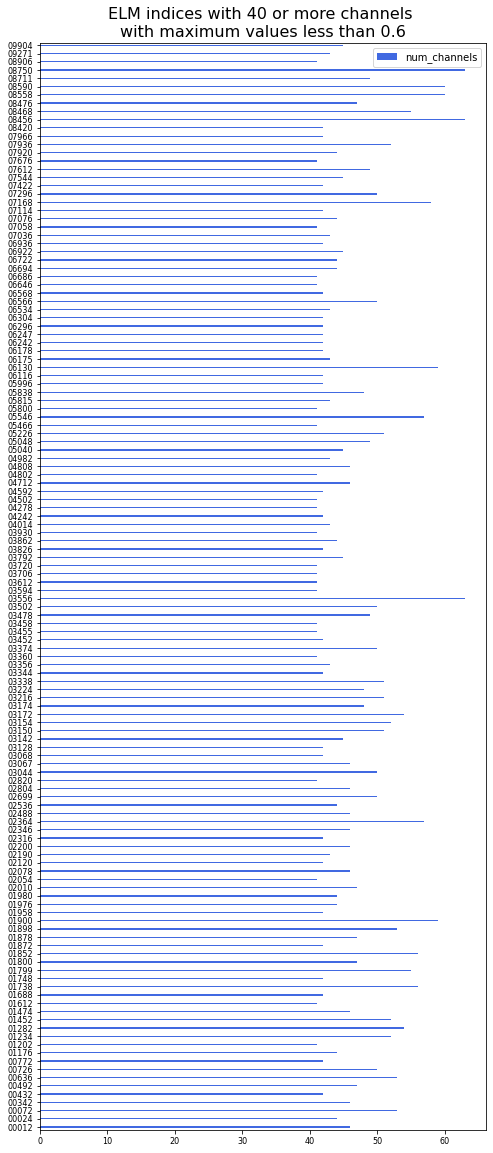

In [8]:
ax = plt.subplot()
unusual_df.plot(
    kind='barh', ax=ax, figsize=(8, 20), width=0.15, color='royalblue', fontsize=8 
)
ax.set_title('ELM indices with 40 or more channels \nwith maximum values less than 0.6', fontsize=16)
plt.show()